In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
data = pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\PGA02\svm and k means clustering\apples_and_oranges.csv")
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


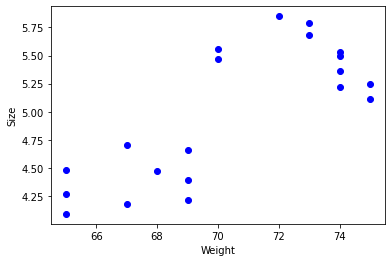

In [6]:
plt.xlabel('Weight')
plt.ylabel('Size')
plt.scatter(data['Weight'],data['Size'],color='blue',marker='o')

In [7]:
# Splitting the dataset into training and test samples
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data,test_size = 0.2, random_state=1)

In [9]:
# Classify the predictors and target
x_train = training_set.iloc[:,0:2].values # independent variables
y_train = training_set.iloc[:,2].values   # dependent variables
x_test = test_set.iloc[:,0:2].values
y_test = test_set.iloc[:,2].values
# iloc gets rows (and/or columns) at intger locations

In [11]:
# Initializing SVM and fitting the training data
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=1)
classifier.fit(x_train,y_train)

#In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function
#used in various kernelized learning algorithms. In particular, it is commonly used in support vector
#machine classification.

#Radial Basis Kernel is a kernel function that is used in machine learning to find a non-linear
#classifier or regression line.

# The above is true when SVM is used to handle regression problems.

SVC(random_state=1)

In [12]:
# Predicting the classes for test set
Y_pred = classifier.predict(x_test)

In [13]:
# Attaching the prediction to test set for comparing
test_set['Prediction'] = Y_pred

In [14]:
# Comparing the actual classes and predictions
test_set

,Weight,Size,Class,Prediction
3,72,5.85,apple,apple
16,69,4.66,orange,orange
6,70,5.56,apple,apple
10,73,5.79,apple,apple


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
cm

array([[3, 0],
       [0, 1]], dtype=int64)

In [22]:
accuracy = float(cm.diagonal().sum())/len(y_test)
print("Accuracy of SVM for the given dataset", accuracy)

Accuracy of SVM for the given dataset 1.0
